In [2]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------ --------------- 5.0/8.1 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 26.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 22.1 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- -------------

C:\Users\Paras\AppData\Local\Temp\ipykernel_24644\2142807911.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MathScore'].fillna(df['MathScore'].mean(), inplace=True)
C:\Users\Paras\AppData\Local\Temp\ipykernel_24644\2142807911.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

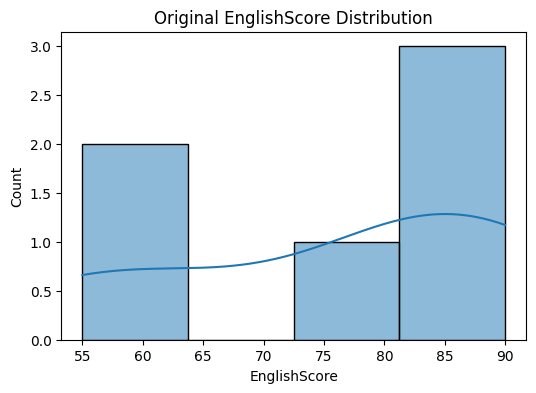

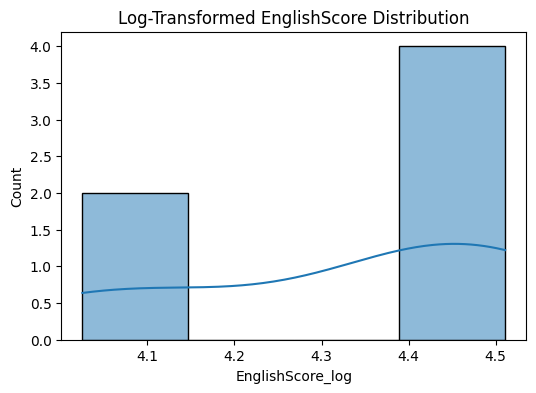

   StudentID    Name  MathScore  ScienceScore  EnglishScore  Attendance  \
0          1    John       85.0          78.0            80          95   
1          2    Emma       90.0          82.0            85          88   
2          3  Sophia       86.0          88.0            87          92   
3          4    Mike       70.0          78.6            60          65   
4          5   Chris      100.0          75.0            90         100   
5          6   Laura       65.0          70.0            55          85   

   EnglishScore_log  
0          4.394449  
1          4.454347  
2          4.477337  
3          4.110874  
4          4.510860  
5          4.025352  


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataset
data = {
    'StudentID': [1, 2, 3, 4, 5, 6],
    'Name': ['John', 'Emma', 'Sophia', 'Mike', 'Chris', 'Laura'],
    'MathScore': [85, 90, np.nan, 70, 120, 65],
    'ScienceScore': [78, 82, 88, np.nan, 75, 70],
    'EnglishScore': [80, 85, 87, 60, 90, 55],
    'Attendance': [95, 88, 92, 65, 102, 85]
}
df = pd.DataFrame(data)

# Missing values
df['MathScore'].fillna(df['MathScore'].mean(), inplace=True)
df['ScienceScore'].fillna(df['ScienceScore'].mean(), inplace=True)

# Outlier detection and handling
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

df['MathScore'] = np.where(df['MathScore'] > 100, 100, df['MathScore'])
df['Attendance'] = np.where(df['Attendance'] > 100, 100, df['Attendance'])

# Transformation: Log of EnglishScore
plt.figure(figsize=(6,4))
sns.histplot(df['EnglishScore'], kde=True)
plt.title('Original EnglishScore Distribution')
plt.show()

df['EnglishScore_log'] = np.log1p(df['EnglishScore'])

plt.figure(figsize=(6,4))
sns.histplot(df['EnglishScore_log'], kde=True)
plt.title('Log-Transformed EnglishScore Distribution')
plt.show()

# Final data
print(df)
